In [205]:
import torch
import importlib
import matplotlib.pyplot as plt

import utils
import diffusion
import noise_adder

importlib.reload(utils)
importlib.reload(diffusion)
importlib.reload(noise_adder)

from utils import visualize_process, load_transformed_CIFAR10
from diffusion import Diffusion


from noise_adder import Scheduler, SigmoidScheduler, CosineScheduler, LinearScheduler, InverseScheduler, PolynomialScheduler, ExponentialScheduler, LogarithmicScheduler, PolynomialScheduler2, LogarithmicScheduler2

# Load dataset

In [207]:
batch_size = 50

data, dataloader = load_transformed_CIFAR10(batch_size=batch_size)

Files already downloaded and verified


# Loss plot

In [208]:
loss_cosine = [0.08806840207800269, 0.06579682507738471, 0.06261227902770042, 0.06066176458075643, 0.06075371401757002, 0.059708052285015585, 0.059431734574958685, 0.05939227558672428, 0.05867254276201129, 0.05847190796397626, 0.058343373019248246, 0.058136017888784405, 0.057910506442189216, 0.05722341725230217, 0.05808987889438868, 0.057709442941471935, 0.0570852825883776, 0.05701904042996466, 0.05669090082123875, 0.05687381730042398, 0.05663793740607798, 0.056981216894462706, 0.05631633687391877, 0.056733871627599, 0.05683456929028034, 0.05648267282359302, 0.05651449311897159, 0.05638877407833934, 0.05602104189246893, 0.05624889437668026, 0.056144491164013745, 0.05633582140132785, 0.05520948784425855, 0.05613567771203816, 0.0557590993642807, 0.05576183512993157, 0.05549715249799192, 0.05545467810332775, 0.05512136779911816, 0.05559304582886398, 0.05550434042327106, 0.055083094093948605, 0.05543321524374187, 0.05504826023802161, 0.05633447428606451, 0.055888102743774655, 0.05556083994358778, 0.05515562945790589, 0.05488281610049307, 0.05510071024671197, 0.055060435654595494, 0.05525323726609349, 0.055717281080782416, 0.05498405971750617, 0.0551221613548696, 0.054688746966421606, 0.05449996544420719, 0.05395263375900686, 0.054388368437066674, 0.05412755162641406, 0.054212943326681855, 0.05441469568759203, 0.05399803102388978, 0.054833396581932904, 0.05457855812460184, 0.05379245037958026, 0.05326465833745897, 0.05375013533979654, 0.05461158652603626, 0.05402199269644916, 0.05388468616455793, 0.053975532146170735, 0.053716565651819106, 0.0541470962241292, 0.05305179895460606, 0.05354852798953652, 0.05349439677223563, 0.053459915721789, 0.05367093860730529, 0.05328564031794667, 0.05371690951287746, 0.05313675900362432, 0.05279126374050975, 0.05385677479952574, 0.05326322081312537, 0.05361307641863823, 0.05292359752766788, 0.0533937710467726, 0.05319065707176924, 0.05293964427523315, 0.05314539610408246, 0.05345919516868889, 0.05366388163529336]
loss_linear = [0.05491327388584614, 0.03708573240507394, 0.03434912833105773, 0.0337610684838146, 0.03313473495561629, 0.032909609315916896, 0.03269468212500214, 0.03251143390778452, 0.032048728451132776, 0.031511101908050475, 0.03137445897702128, 0.0313035417534411, 0.03146433101035655, 0.03160476271342486, 0.031047537940554322, 0.03094861173722893, 0.0309920001514256, 0.03111119442526251, 0.030508217076770962, 0.0308716913247481, 0.03088976743724197, 0.03072213539853692, 0.030855671263299883, 0.030826278823427856, 0.030167390638031064, 0.03059184827283025, 0.030405262309126557, 0.030274485824629663, 0.030349033710546792, 0.03039692198485136, 0.030551998893730344, 0.030146481866948308, 0.029824748680926858, 0.0304148481329903, 0.030039436244405807, 0.02946819954458624, 0.02923849806562066, 0.029689599693752827, 0.02965591979585588, 0.02970525538735092, 0.029587908389046787, 0.02926284308452159, 0.029630342673510314, 0.029979278972372413, 0.029279301127418875, 0.029404293339699506, 0.03000625158380717]

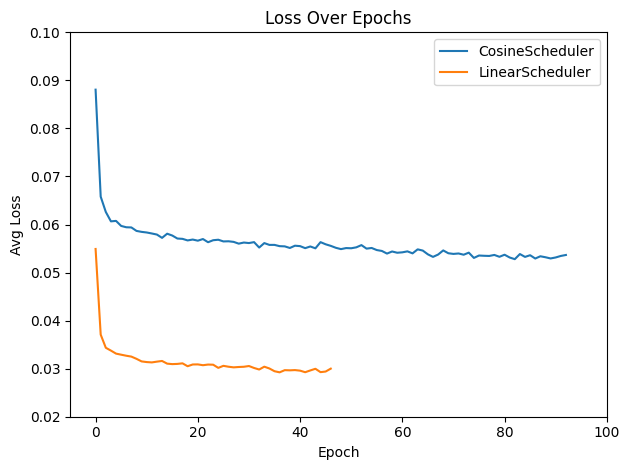

In [209]:
plt.plot(range(len(loss_cosine)), loss_cosine, label="CosineScheduler")
plt.plot(range(len(loss_linear)), loss_linear, label="LinearScheduler")
plt.title(f"Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Avg Loss")
plt.xlim(-5, 100)
plt.ylim(0.02, 0.1)
plt.legend()
plt.tight_layout()
plt.show()



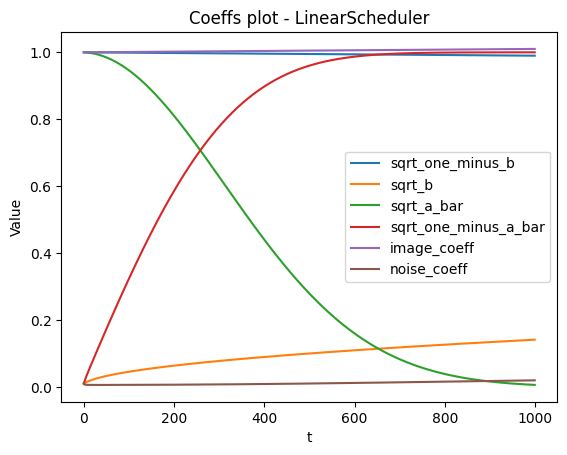

tensor(1.0102)


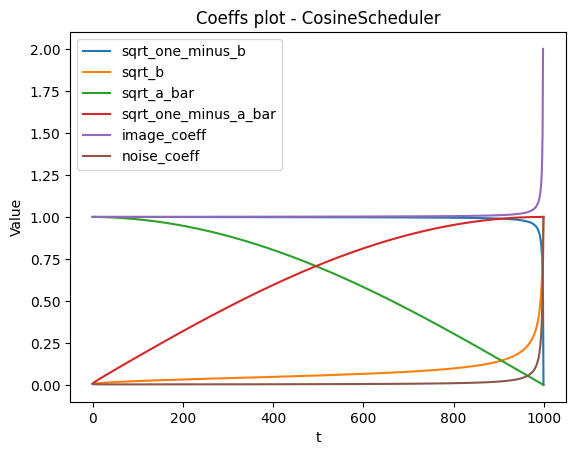

tensor(inf)


In [210]:
diffusions = [Diffusion(scheduler=LinearScheduler(T=1000)), Diffusion(scheduler=CosineScheduler(T=1000))]

for diffuser in diffusions:
    coeffs = diffuser.coeffs
    coeffs.keys()

    plt.figure()

    for label, tensor in coeffs.items():
        plt.plot(range(len(tensor)), tensor, label=label)

    plt.title(f"Coeffs plot - {diffuser.scheduler.__class__.__name__}")
    plt.xlabel("t")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    print(coeffs['image_coeff'][-1])
    if diffuser.scheduler.__class__.__name__ == "CosineScheduler":
        coeffs['image_coeff'][-1] = 1.9999



# Schedulers

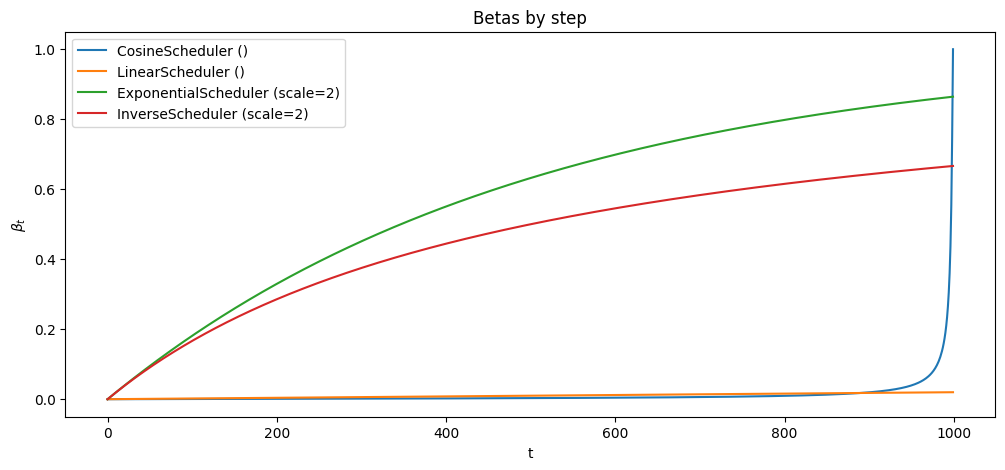

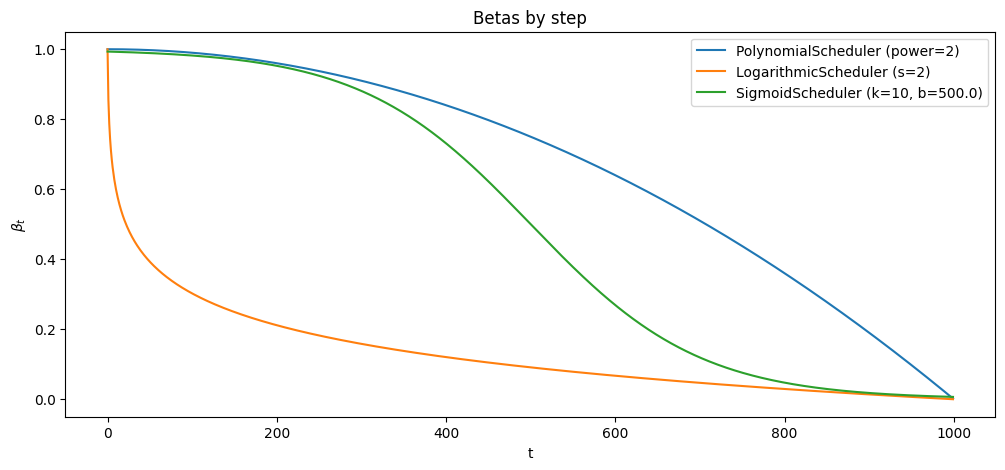

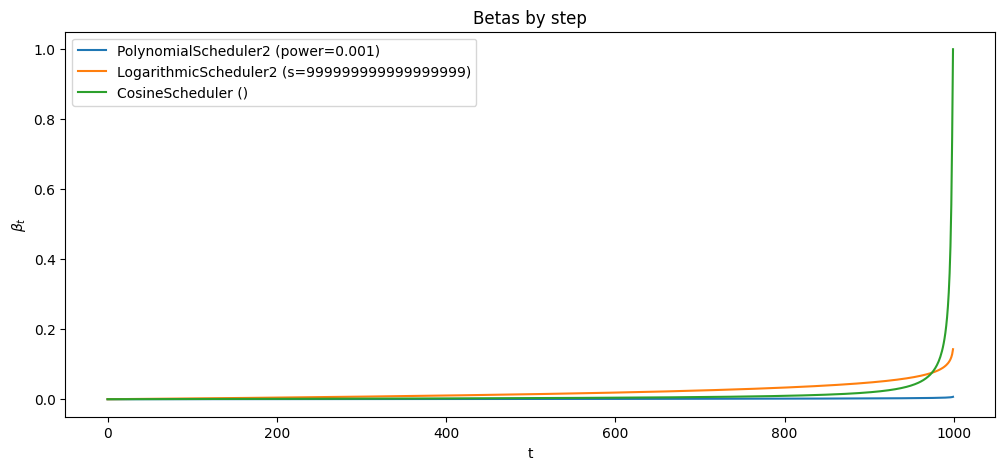

In [220]:
T = 1000

schedulers_A = [
    ("CosineScheduler", CosineScheduler(T=T)),
    ("LinearScheduler", LinearScheduler(T=T, start=0.0001, end=0.02)),
    ("ExponentialScheduler", ExponentialScheduler(T=T, scale=2)),    # 0.02
    ("InverseScheduler", InverseScheduler(T=T, scale=2)),    # 0.02
]

schedulers_B = [
    ("PolynomialScheduler", PolynomialScheduler(T=T, power=2)),  # 0.01
    ("LogarithmicScheduler", LogarithmicScheduler(T=T, s=2)),    # 999999999999999999
    ("SigmoidScheduler", SigmoidScheduler(T=T, k=10, b=T/2)),
]

schedulers_C = [
    ("PolynomialScheduler2", PolynomialScheduler2(T=T, power=0.001)),
    ("LogarithmicScheduler2", LogarithmicScheduler2(T=T, s=999999999999999999)),
    ("CosineScheduler", CosineScheduler(T=T)),
]

def plot_schedulers(schedulers: list[tuple[str, Scheduler]]):
    plt.figure(figsize=(12, 5))

    for name, sched in schedulers:
        betas = sched.betas.detach().cpu().numpy()
        params_str = ' (' + ', '.join(f'{k}={v}' for k, v in sched.params.items()) + ')'
        plt.plot(range(T), betas, label=name+params_str)

    plt.xlabel("t")
    plt.ylabel(r"$\beta_t$")
    plt.title("Betas by step")
    # plt.ylim(0, 0.2)   # 0.02
    plt.legend()
    plt.show()


plot_schedulers(schedulers_A)
plot_schedulers(schedulers_B)
plot_schedulers(schedulers_C)

CosineScheduler


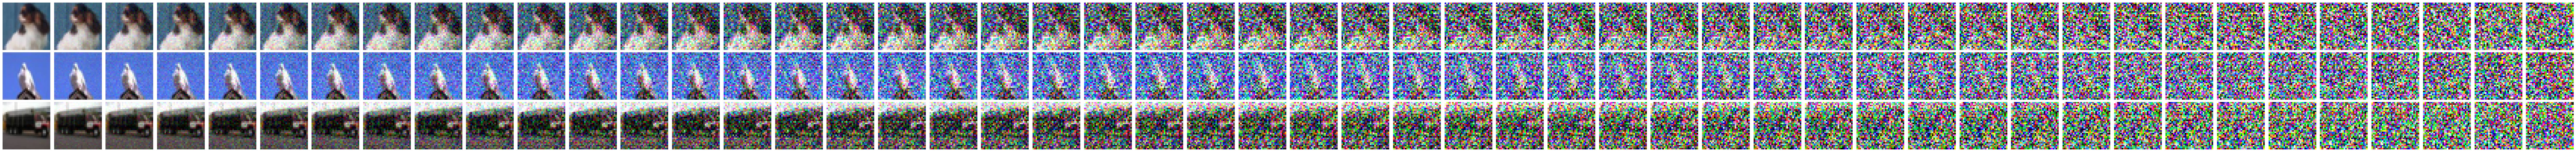

PolynomialScheduler


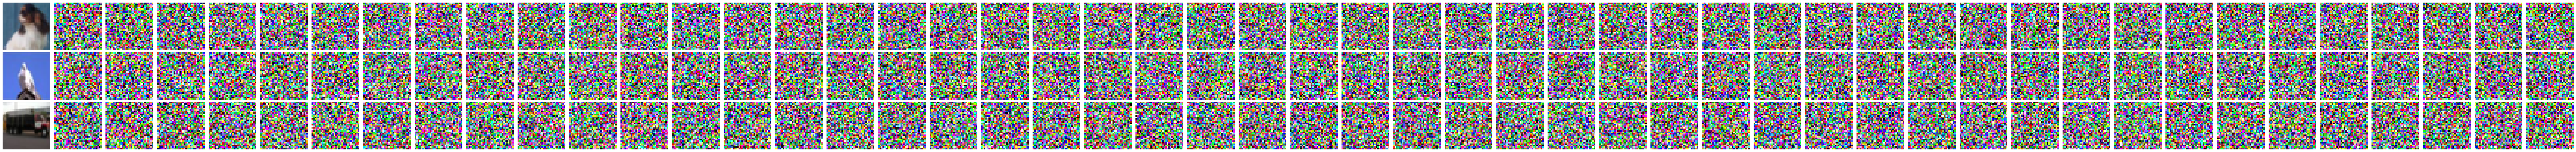

LogarithmicScheduler


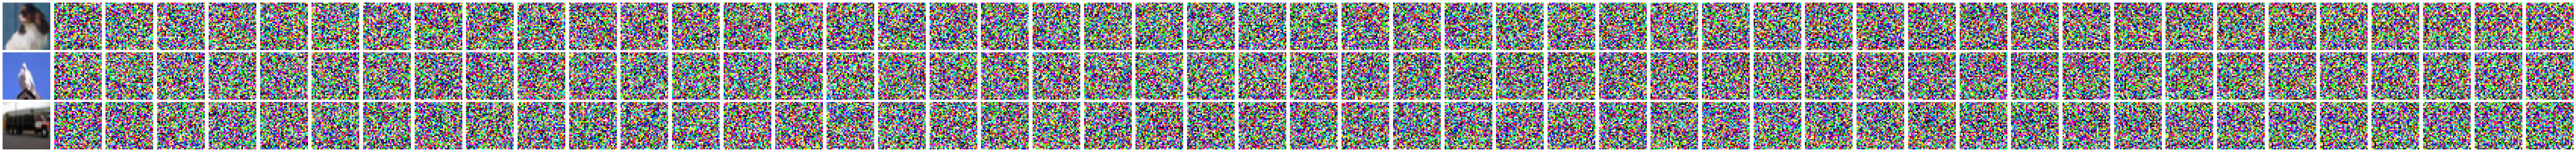

SigmoidScheduler


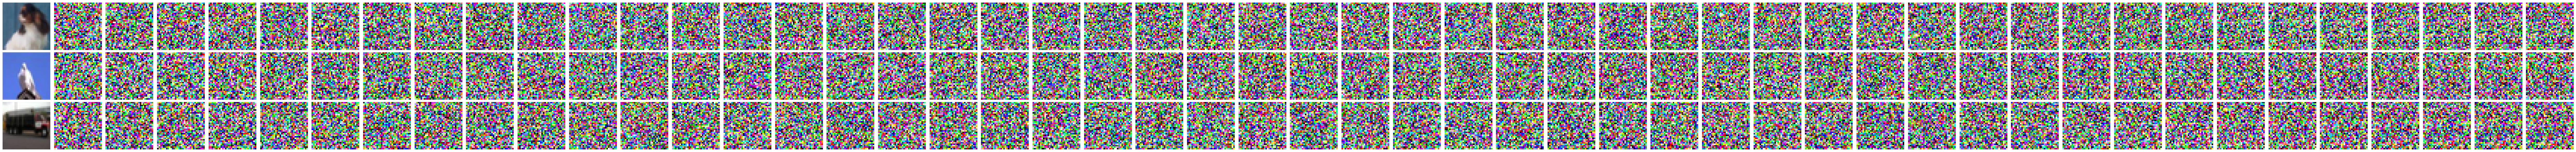

PolynomialScheduler2


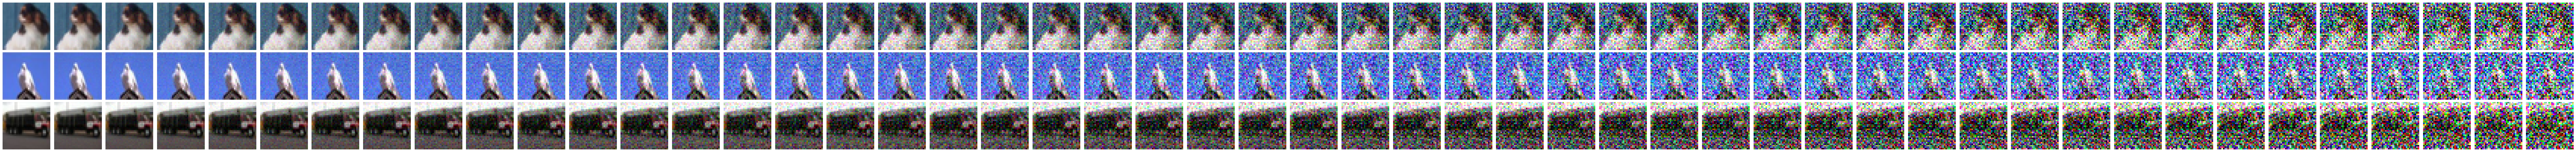

LogarithmicScheduler2


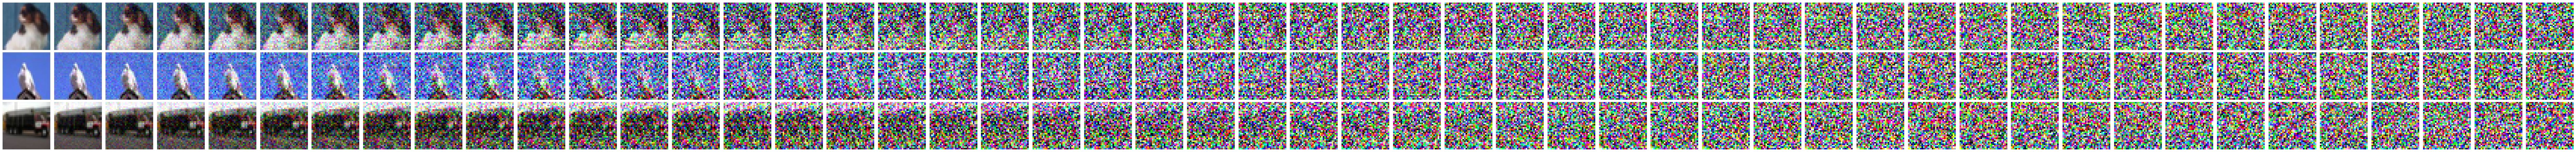

CosineScheduler


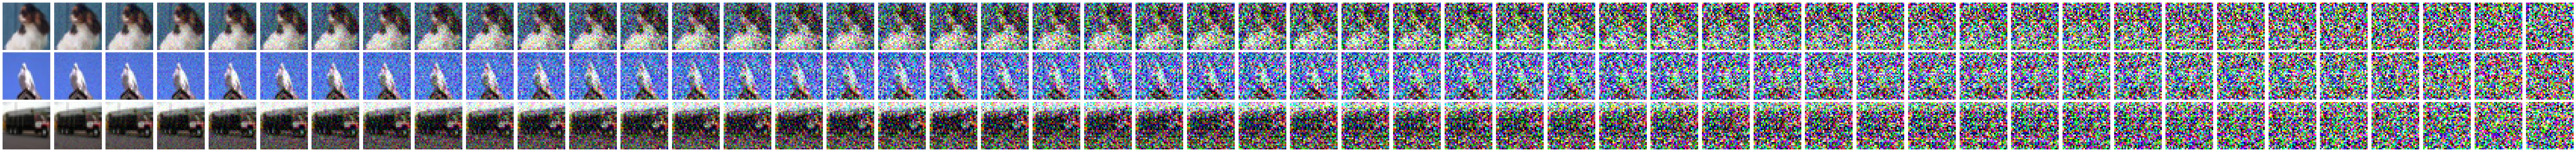

In [219]:
# it = iter(dataloader)
# imgs, labels = next(it)


for name, scheduler in schedulers_A + schedulers_B + schedulers_C:
    print(name)
    diffuser = Diffusion(scheduler)

    n_rows = 3
    n_cols = 50
    T = 1000

    forward_process_list = diffuser.get_forward_process_list(x_0=imgs)
    visualize_process(forward_process_list, n_rows, n_cols)
